In [1]:
from days_statistics import DaysStatistics
from data_helper import DataHelper
from sklearn.ensemble import ExtraTreesRegressor
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from models.tree_models import MyExtraTreesRegressor, MyExtraTreesClassifier, MyRandomForestRegressor, MyRandomForestClassifier
%matplotlib inline

In [8]:
dh = DataHelper()
days_train = dh.get_training_days(False)
days_test = dh.get_testing_days()
days_valid  = dh.get_validation_days()
print(len(days_train), len(days_test), len(days_valid))

253 255 126


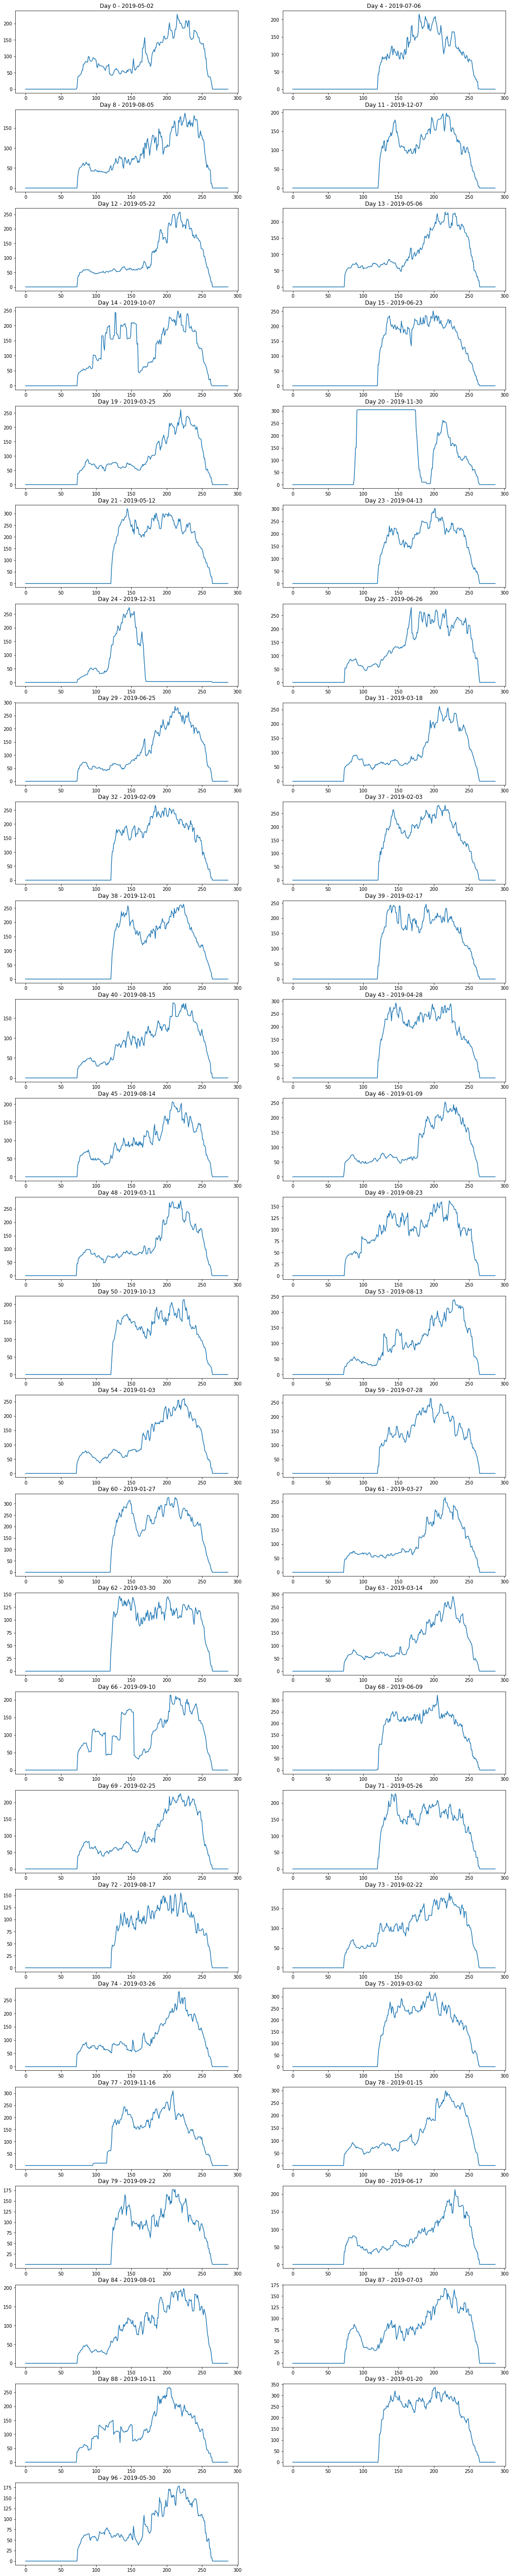

In [11]:
dh.plot_days(days_valid[0:100])

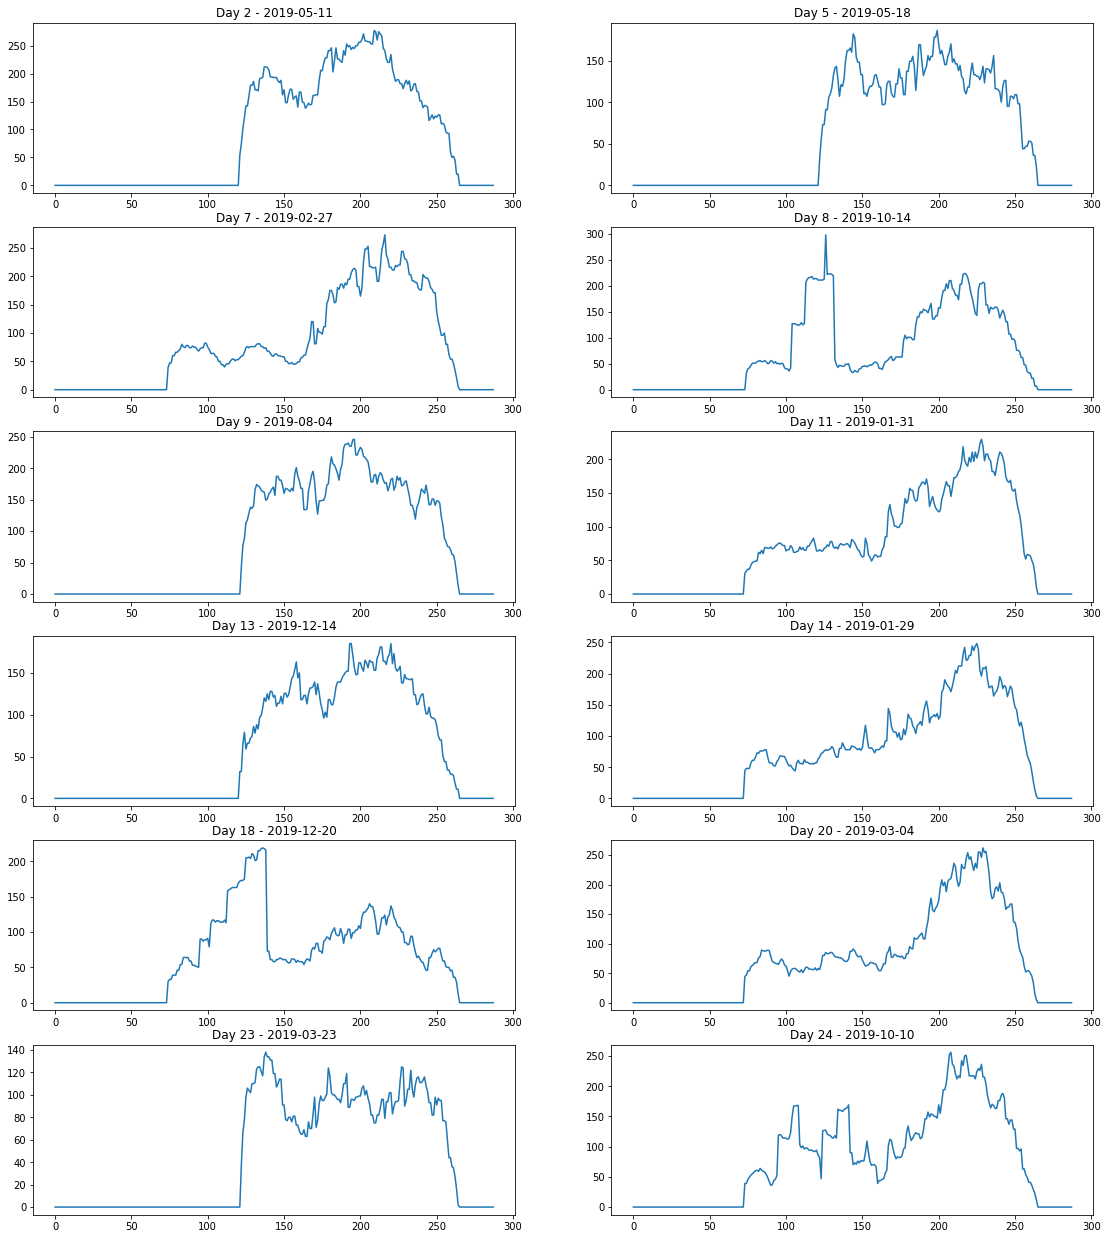

In [12]:
dh.plot_days(days_valid[100:])

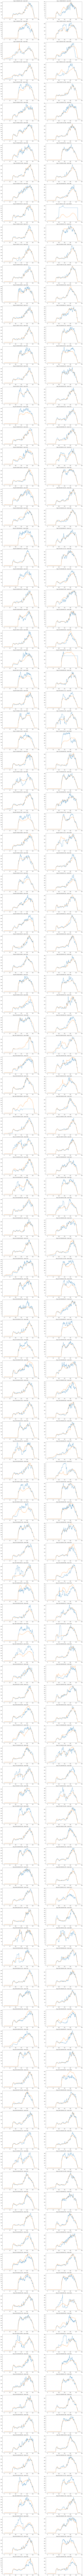

In [6]:
etr = MyExtraTreesRegressor()
# etr.fit_on_training_set()
etr.load_model()
# etr.print_mse()
etr.show_n_predictions('all')

In [2]:
def prepare_plot(size=(16,9), ax=None, y_max=250, every_hour=True, no_y_change=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=size)

    ax.set_xlim(60, 276)
    ax.set_ylim(0, y_max)
    
    if False == no_y_change:
        ax.yaxis.set_major_locator(MultipleLocator(50))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    
    if every_hour:
        ax.xaxis.set_major_locator(MultipleLocator(12))
        ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    else:
        ax.xaxis.set_major_locator(MultipleLocator(24))
        ax.xaxis.set_minor_locator(AutoMinorLocator(9))
    
    # Turn grid on for both major and minor ticks and style minor slightly
    # differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    ax.set_xlabel('Time [hour:minute]', fontsize=14)
    ax.set_ylabel('Pool attendance', fontsize=14)
    return ax

In [3]:
dh = DataHelper()
etr = MyExtraTreesRegressor()
etr.load_model()
test_day_ids = [76,71,45,96,26,245]
predictions = []
labels = []
ground_truth = []
offset = []
days_list = dh.get_testing_days()

for day_id in test_day_ids:
    x, y = dh.get_test_day_feature_vectors(day_id, etr.columns, etr.time_steps_back)
    y_pred = dh.predict_day_from_features(x, etr.model, etr.time_steps_back)
    day_date = days_list[day_id].data['time'].iloc[0][:10]
    
    predictions.append(y_pred)
    ground_truth.append(y)
    mse = mean_squared_error(y_pred, y)
    
    labels.append('%s - MSE = %.0f' % (day_date, mse))

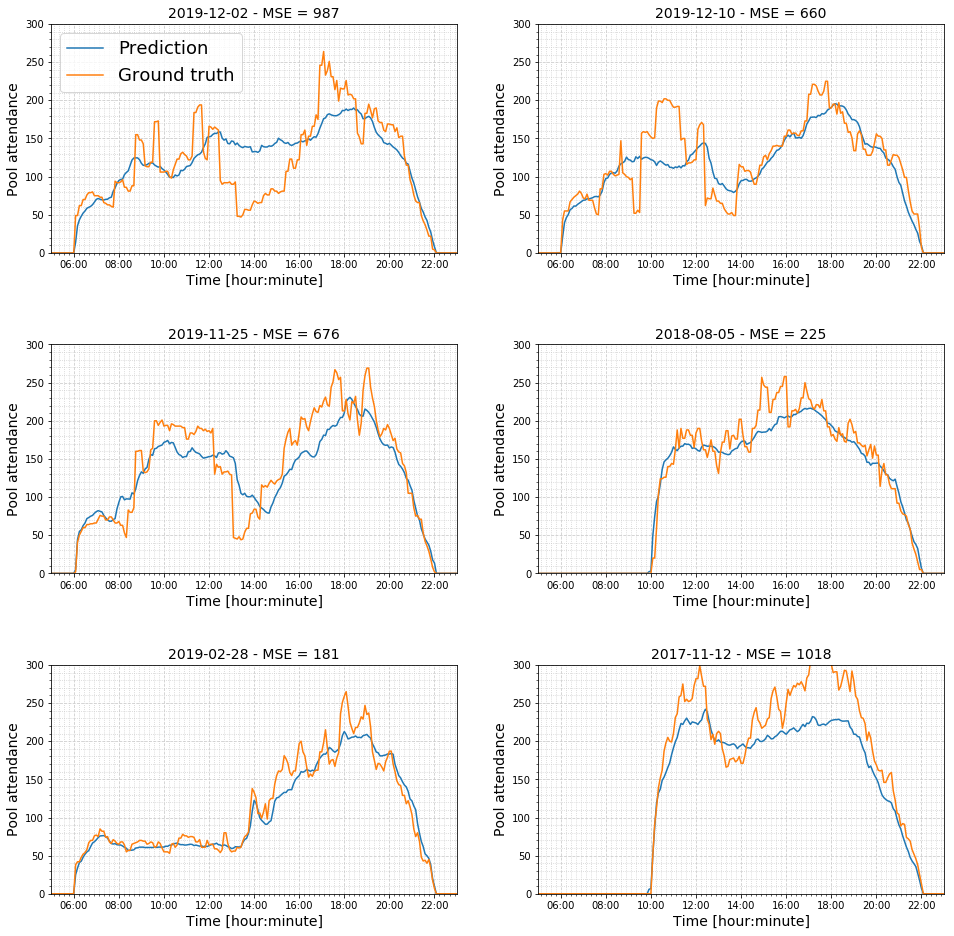

In [4]:
a = datetime(2000, 1, 1, 23, 55, 0, 342380)
y = []
for i in range(288):
    a = a + timedelta(minutes=5)
    y.append(a.strftime('%H:%M'))

fig, axs = plt.subplots(3, 2, figsize=(16,16), gridspec_kw={'hspace': 0.4})
column = 0
row = 0
for i, day_id in enumerate(test_day_ids):
    prepare_plot((8,3), axs[row, column], 300, False)
    axs[row, column].set_title(labels[i], fontsize=14)
    l1 = axs[row, column].plot(y,predictions[i], label='Prediction')
    l2 = axs[row, column].plot(y,ground_truth[i], label='Ground truth')
    
    if column == 0 and row == 0:    
        axs[row, column].legend(prop={'size': 18})

    column += 1
    if column > 1:
        column = 0
        row += 1